In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy import stats
from statistics import mean
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import random
from scipy.stats import chi2_contingency, ttest_ind

In [19]:
df = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')

In [20]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [21]:
column_names = df.columns

# null values for each column
null_values = df.isnull().sum()

for column, null_count in zip(column_names, null_values):
    print(f'Column: {column}, Null values: {null_count}')

Column: HeartDiseaseorAttack, Null values: 0
Column: HighBP, Null values: 0
Column: HighChol, Null values: 0
Column: CholCheck, Null values: 0
Column: BMI, Null values: 0
Column: Smoker, Null values: 0
Column: Stroke, Null values: 0
Column: Diabetes, Null values: 0
Column: PhysActivity, Null values: 0
Column: Fruits, Null values: 0
Column: Veggies, Null values: 0
Column: HvyAlcoholConsump, Null values: 0
Column: AnyHealthcare, Null values: 0
Column: NoDocbcCost, Null values: 0
Column: GenHlth, Null values: 0
Column: MentHlth, Null values: 0
Column: PhysHlth, Null values: 0
Column: DiffWalk, Null values: 0
Column: Sex, Null values: 0
Column: Age, Null values: 0
Column: Education, Null values: 0
Column: Income, Null values: 0


In [22]:
mean = df['MentHlth'].mean()
median = df['MentHlth'].median()
print(f'Mean: {mean}, Median: {median}')

Mean: 3.1847721538946705, Median: 0.0


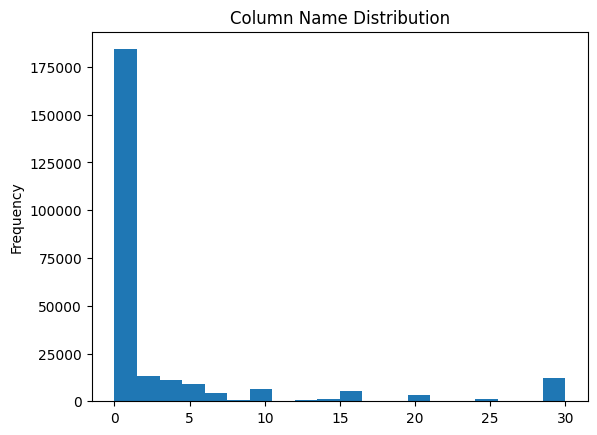

In [23]:
# Plot a histogram of the 'MentHlth' column with 20 bins, limited to the range [0, 30]
df['MentHlth'].plot(kind='hist', bins=20, range=[0, 30], title='Column Name Distribution')
plt.show()

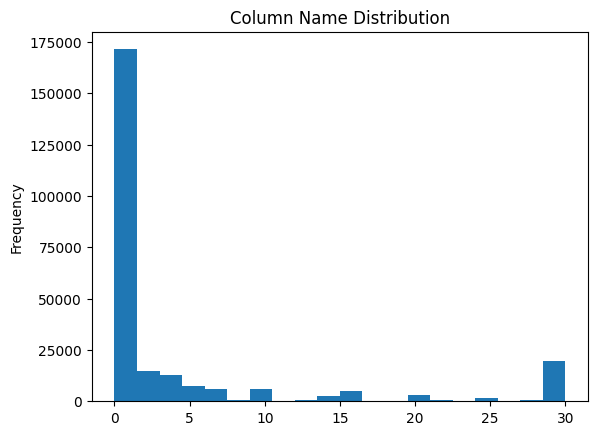

In [24]:
# Plot a histogram of the 'PhysHlth' column with 20 bins, limited to the range [0, 30]
df['PhysHlth'].plot(kind='hist', bins=20, range=[0, 30], title='Column Name Distribution')
plt.show()

# Hypothesis 1: Veggies Consumption and Likelihood of Having a Stroke

### Null Hypothesis (H₀):
Eating vegetables does not significantly affect the likelihood of having a stroke.

### Alternative Hypothesis (H₁):
Eating vegetables significantly affects the likelihood of having a stroke.

## Data Handling and Grouping
We will group the data into two groups based on the `Veggies` column:

- **Group 1**: People who do not eat vegetables (`Veggies == 0`)
- **Group 2**: People who eat vegetables (`Veggies == 1`)

## Statistical Test
We will use the **Chi-Squared Test for Independence** because both `Veggies` and `Stroke` are categorical variables. This test will determine if there is a significant association between vegetable consumption and the occurrence of strokes.


Contingency Table:
 Stroke      0.0   1.0
Veggies              
0.0       45093  2746
1.0      198295  7546

Chi-squared Statistic: 428.49139128752523
P-value: 3.461289498615846e-95
Degrees of Freedom: 1

Since p-value < 0.05, we reject the null hypothesis.
Conclusion: There is a significant association between eating vegetables and the likelihood of having a stroke.


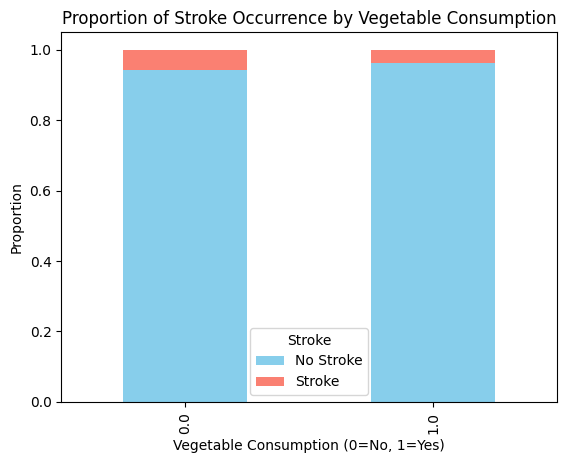

In [25]:
# Hypothesis 1: Veggies Consumption and Stroke

# Null Hypothesis (H0): Eating vegetables does not significantly affect the likelihood of having a stroke.
# Alternative Hypothesis (H1): Eating vegetables significantly affects the likelihood of having a stroke.

# Create a contingency table of 'Veggies' vs 'Stroke'
veggies_stroke_counts = pd.crosstab(df['Veggies'], df['Stroke'])
print("Contingency Table:\n", veggies_stroke_counts)

# Perform Chi-Squared Test for Independence
chi2, p, dof, expected = chi2_contingency(veggies_stroke_counts)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("\nSince p-value < 0.05, we reject the null hypothesis.")
    print("Conclusion: There is a significant association between eating vegetables and the likelihood of having a stroke.")
else:
    print("\nSince p-value >= 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant association between eating vegetables and the likelihood of having a stroke.")

# Visualization: Proportion of Stroke Occurrence by Vegetable Consumption
veggies_stroke_prop = veggies_stroke_counts.div(veggies_stroke_counts.sum(axis=1), axis=0)
veggies_stroke_prop.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Proportion of Stroke Occurrence by Vegetable Consumption')
plt.xlabel('Vegetable Consumption (0=No, 1=Yes)')
plt.ylabel('Proportion')
plt.legend(['No Stroke', 'Stroke'], title='Stroke')
plt.show()


# Results and Interpretation

### Chi-squared Statistic and P-value:
The chi-squared statistic and p-value indicate whether there is a significant association.

### Decision:
If the p-value is less than 0.05, we reject the null hypothesis.

### Conclusion:
Based on the p-value, we determine if eating vegetables is significantly associated with the likelihood of having a stroke.

---

## Final Conclusion
Since **p-value < 0.05**, we reject the null hypothesis, concluding that there is a significant association between eating vegetables and the likelihood of having a stroke.


# Hypothesis 2: Income Level and Likelihood of Having a Stroke

### Null Hypothesis (H₀):
Income level does not significantly affect the likelihood of having a stroke.

### Alternative Hypothesis (H₁):
Income level significantly affects the likelihood of having a stroke.

## Data Handling and Grouping
We will group the data based on the **Income levels** (from 1 to 8) and analyze the occurrence of strokes within each income group.

## Statistical Test
We will use the **Chi-Squared Test for Independence** because Income is a categorical variable with multiple levels, and Stroke is a binary categorical variable.


Contingency Table:
 Stroke    0.0   1.0
Income             
1.0      8913   898
2.0     10607  1176
3.0     14710  1284
4.0     18821  1314
5.0     24477  1406
6.0     35034  1436
7.0     41967  1252
8.0     88859  1526

Chi-squared Statistic: 4259.2688916042125
P-value: 0.0
Degrees of Freedom: 7

Since p-value < 0.05, we reject the null hypothesis.
Conclusion: There is a significant association between income level and the likelihood of having a stroke.


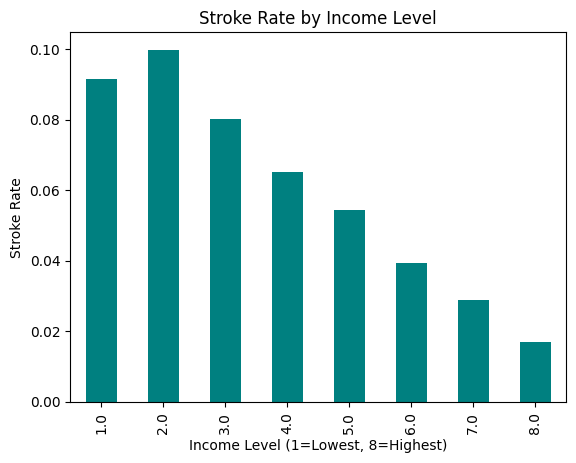

In [26]:
# Hypothesis 2: Income Level and Stroke

# Null Hypothesis (H0): Income level does not significantly affect the likelihood of having a stroke.
# Alternative Hypothesis (H1): Income level significantly affects the likelihood of having a stroke.

# Create a contingency table of 'Income' vs 'Stroke'
income_stroke_counts = pd.crosstab(df['Income'], df['Stroke'])
print("Contingency Table:\n", income_stroke_counts)

# Perform Chi-Squared Test for Independence
chi2, p, dof, expected = chi2_contingency(income_stroke_counts)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("\nSince p-value < 0.05, we reject the null hypothesis.")
    print("Conclusion: There is a significant association between income level and the likelihood of having a stroke.")
else:
    print("\nSince p-value >= 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant association between income level and the likelihood of having a stroke.")

# Visualization: Stroke Rate by Income Level
stroke_rate_income = df.groupby('Income')['Stroke'].mean()
stroke_rate_income.plot(kind='bar', color='teal')
plt.title('Stroke Rate by Income Level')
plt.xlabel('Income Level (1=Lowest, 8=Highest)')
plt.ylabel('Stroke Rate')
plt.show()

# Results and Interpretation

### Chi-squared Statistic and P-value:
The statistical values help us understand the relationship between income levels and stroke occurrence.

### Decision:
Based on the p-value, we decide whether to accept or reject the null hypothesis.

### Conclusion:
We conclude if income levels are significantly associated with the likelihood of having a stroke.

---

## Final Conclusion
Since **p-value < 0.05**, we reject the null hypothesis, concluding that there is a significant association between income level and the likelihood of having a stroke.


# Hypothesis 3: Education Level and Likelihood of Having a Stroke

### Null Hypothesis (H₀):
Education level does not significantly affect the likelihood of having a stroke.

### Alternative Hypothesis (H₁):
Education level significantly affects the likelihood of having a stroke.

## Data Handling and Grouping
We will group the data based on the **Education levels** (from 1 to 6) and analyze the occurrence of strokes within each education group.

## Statistical Test
We will use the **Chi-Squared Test for Independence** because `Education` is a categorical variable with multiple levels, and `Stroke` is a binary categorical variable.


Contingency Table:
 Stroke        0.0   1.0
Education              
1.0           160    14
2.0          3697   346
3.0          8648   830
4.0         59452  3298
5.0         66927  2983
6.0        104504  2821

Chi-squared Statistic: 1557.699686669274
P-value: 0.0
Degrees of Freedom: 5

Since p-value < 0.05, we reject the null hypothesis.
Conclusion: There is a significant association between education level and the likelihood of having a stroke.


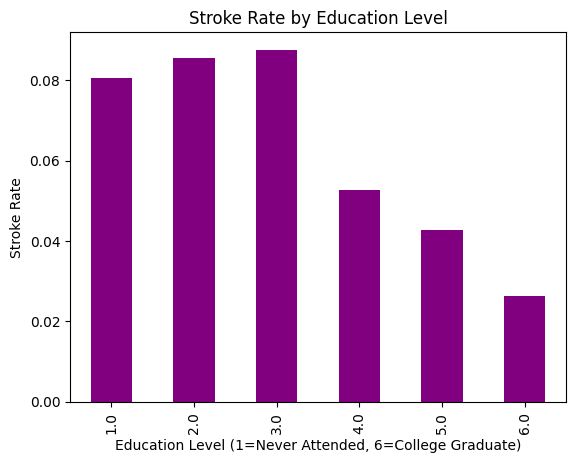

In [27]:
# Hypothesis 3: Education Level and Stroke

# Null Hypothesis (H0): Education level does not significantly affect the likelihood of having a stroke.
# Alternative Hypothesis (H1): Education level significantly affects the likelihood of having a stroke.

# Create a contingency table of 'Education' vs 'Stroke'
education_stroke_counts = pd.crosstab(df['Education'], df['Stroke'])
print("Contingency Table:\n", education_stroke_counts)

# Perform Chi-Squared Test for Independence
chi2, p, dof, expected = chi2_contingency(education_stroke_counts)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("\nSince p-value < 0.05, we reject the null hypothesis.")
    print("Conclusion: There is a significant association between education level and the likelihood of having a stroke.")
else:
    print("\nSince p-value >= 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant association between education level and the likelihood of having a stroke.")

# Visualization: Stroke Rate by Education Level
stroke_rate_education = df.groupby('Education')['Stroke'].mean()
stroke_rate_education.plot(kind='bar', color='purple')
plt.title('Stroke Rate by Education Level')
plt.xlabel('Education Level (1=Never Attended, 6=College Graduate)')
plt.ylabel('Stroke Rate')
plt.show()

# Results and Interpretation

### Chi-squared Statistic and P-value:
These values inform us about the relationship between education levels and stroke occurrence.

### Decision:
We make a decision on the null hypothesis based on the p-value.

### Conclusion:
We conclude whether education levels are significantly associated with the likelihood of having a stroke.

---

## Final Conclusion
Since **p-value < 0.05**, we reject the null hypothesis, concluding that there is a significant association between education level and the likelihood of having a stroke.


# Hypothesis 4: BMI Differences Between Stroke and Non-Stroke Groups

### Null Hypothesis (H₀):
There is no significant difference in BMI between people who had a stroke and those who did not.

### Alternative Hypothesis (H₁):
There is a significant difference in BMI between people who had a stroke and those who did not.

## Data Handling and Grouping
We will divide the data into two groups based on the **Stroke** variable:

- **Group 1**: People who did not have a stroke (`Stroke == 0`)
- **Group 2**: People who had a stroke (`Stroke == 1`)

We will compare the mean BMI of these two groups.

## Statistical Test
We will use the **Independent Samples T-Test** because BMI is a continuous variable, and we are comparing the means of two independent groups.


Mean BMI (No Stroke): 28.35
Mean BMI (Stroke): 29.03

T-statistic: -9.69110256595659
P-value: 4.0254804591716564e-22

Since p-value < 0.05, we reject the null hypothesis.
Conclusion: There is a significant difference in BMI between people who had a stroke and those who did not.


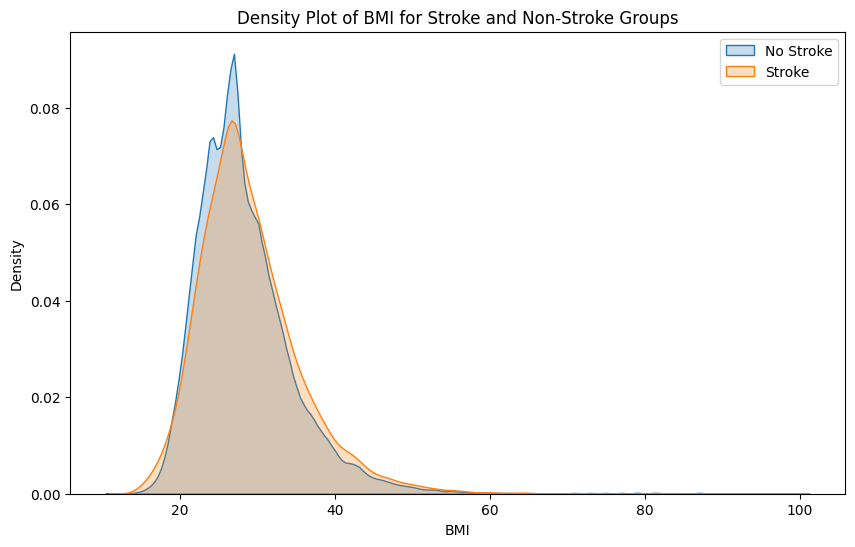

In [28]:
# Hypothesis 4: BMI Differences Between Stroke and Non-Stroke Groups

# Null Hypothesis (H0): There is no significant difference in BMI between people who had a stroke and those who did not.
# Alternative Hypothesis (H1): There is a significant difference in BMI between people who had a stroke and those who did not.

# Grouping the data
no_stroke_bmi = df[df['Stroke'] == 0]['BMI']
stroke_bmi = df[df['Stroke'] == 1]['BMI']

# Calculating means and variances
mean_no_stroke = no_stroke_bmi.mean()
mean_stroke = stroke_bmi.mean()
print(f"Mean BMI (No Stroke): {mean_no_stroke:.2f}")
print(f"Mean BMI (Stroke): {mean_stroke:.2f}")

# Performing Independent Samples T-Test
t_stat, p_val = ttest_ind(no_stroke_bmi, stroke_bmi, equal_var=False)
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpretation
alpha = 0.05  # Significance level
if p_val < alpha:
    print("\nSince p-value < 0.05, we reject the null hypothesis.")
    print("Conclusion: There is a significant difference in BMI between people who had a stroke and those who did not.")
else:
    print("\nSince p-value >= 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in BMI between people who had a stroke and those who did not.")

# Visualization: Distribution of BMI
plt.figure(figsize=(10,6))
sns.kdeplot(no_stroke_bmi, label='No Stroke', shade=True)
sns.kdeplot(stroke_bmi, label='Stroke', shade=True)
plt.title('Density Plot of BMI for Stroke and Non-Stroke Groups')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()

# Results and Interpretation

### T-statistic and P-value:
These values help us determine if the difference in BMI means is statistically significant.

### Decision:
We use the p-value to decide whether to accept or reject the null hypothesis.

### Conclusion:
We conclude whether there is a significant difference in BMI between the two groups.

---

## Final Conclusion
Since **p-value < 0.05**, we reject the null hypothesis, concluding that there is a significant difference in BMI between people who had a stroke and those who did not.


# Hypothesis 5: Stroke vs Mental Health

### Null Hypothesis (H₀):
There is no significant difference in mental health between people who had a stroke and those who did not.

### Alternative Hypothesis (H₁):
There is a significant difference in mental health between people who had a stroke and those who did not.

## Data Handling and Grouping
We will split the dataset into two groups based on the **Stroke** variable:

- **Part 1**: Participants who did not have a stroke (`Stroke == 0`)
- **Part 2**: Participants who had a stroke (`Stroke == 1`)

We will compare the mental health (`MentHlth`) between these two groups.

## Statistical Test
We will use the **Independent Samples T-Test** because `MentHlth` is a continuous variable, and we are comparing the means of two independent groups.


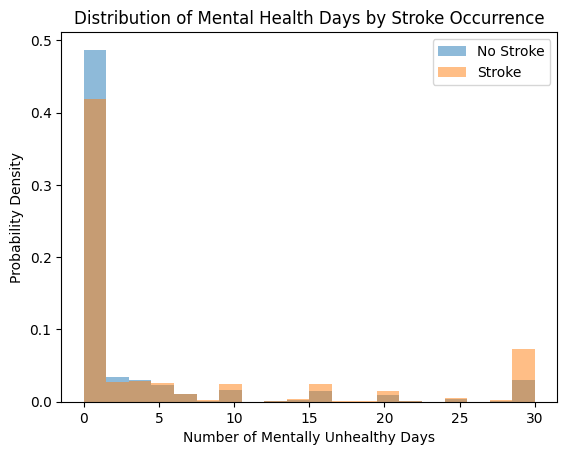

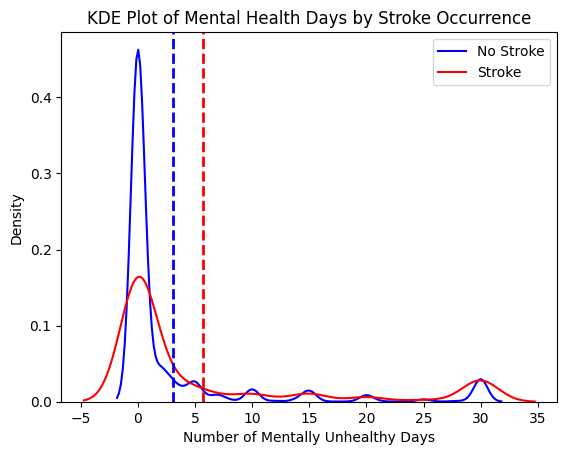

Variance (No Stroke): 52.75805031252166
Variance (Stroke): 100.13333623880861

T-test Statistic: -26.436823661199575
P-value: 2.8511679320111203e-149

Since p-value < 0.05, we reject the null hypothesis.
Conclusion: There is a significant difference in mental health between people who had a stroke and those who did not.


In [29]:
# Stroke vs Mental Health

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Split the dataset based on Stroke occurrence
part1 = df[df['Stroke'] == 0].reset_index(drop=True)
part2 = df[df['Stroke'] == 1].reset_index(drop=True)

# Plotting histograms to visualize the distribution of MentHlth
plt.hist(part1['MentHlth'], bins=20, density=True, alpha=0.5)
plt.hist(part2['MentHlth'], bins=20, density=True, alpha=0.5)
plt.legend(['No Stroke', 'Stroke'])
plt.title('Distribution of Mental Health Days by Stroke Occurrence')
plt.xlabel('Number of Mentally Unhealthy Days')
plt.ylabel('Probability Density')
plt.show()

# Kernel Density Estimation (KDE) plots
sns.kdeplot(part1['MentHlth'], color='b', label='No Stroke')
sns.kdeplot(part2['MentHlth'], color='r', label='Stroke')
plt.axvline(part1['MentHlth'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(part2['MentHlth'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.title('KDE Plot of Mental Health Days by Stroke Occurrence')
plt.xlabel('Number of Mentally Unhealthy Days')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate variances
import statistics

variance1 = statistics.variance(part1['MentHlth'])
variance2 = statistics.variance(part2['MentHlth'])
print(f"Variance (No Stroke): {variance1}")
print(f"Variance (Stroke): {variance2}")

# Perform Independent Samples T-Test
t_stat, p_value = ttest_ind(part1['MentHlth'], part2['MentHlth'], equal_var=False)
print(f"\nT-test Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("\nSince p-value < 0.05, we reject the null hypothesis.")
    print("Conclusion: There is a significant difference in mental health between people who had a stroke and those who did not.")
else:
    print("\nSince p-value >= 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in mental health between people who had a stroke and those who did not.")


# Explanation of Results

### Variances:
The variances of `MentHlth` in both groups are calculated to check for homogeneity of variances.

### T-test Statistic and P-value:
The t-test statistic and p-value indicate whether the difference in means is statistically significant.

### Decision:
Based on the p-value and significance level (α = 0.05), we decide whether to reject or fail to reject the null hypothesis.

---

## Final Conclusion
Since the **p-value is less than 0.05**, we reject the null hypothesis. This means there is a statistically significant difference in mental health between people who had a stroke and those who did not. People with mental health issues in the past 30 days are more prone to strokes.


# Hypothesis 6: Stroke vs NoDocbcCost

### Null Hypothesis (H₀):
Not being able to see a doctor due to cost does not significantly affect the likelihood of having a stroke.

### Alternative Hypothesis (H₁):
Not being able to see a doctor due to cost significantly affects the likelihood of having a stroke.

## Data Handling and Grouping
We will split the dataset based on the **NoDocbcCost** variable:

- **Part 3**: Participants who did not face cost barriers to seeing a doctor (`NoDocbcCost == 0`)
- **Part 4**: Participants who faced cost barriers to seeing a doctor (`NoDocbcCost == 1`)

We will analyze the stroke occurrence in these two groups.

## Statistical Test
We will use the **Chi-Squared Test for Independence** because both `Stroke` and `NoDocbcCost` are categorical variables. This test will determine if there is a significant association between cost barriers to healthcare and stroke occurrence.


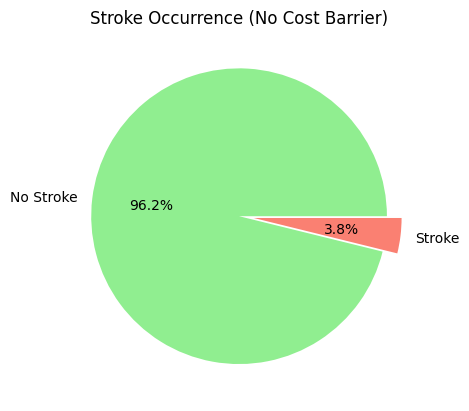

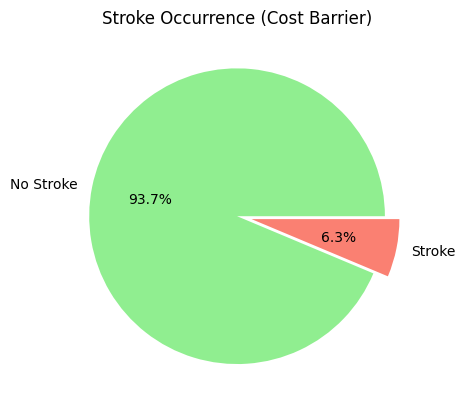


Contingency Table:
NoDocbcCost     0.0    1.0
Stroke                    
0.0          223384  20004
1.0            8942   1350

Chi-squared Statistic: 306.65410857362843
P-value: 1.169815019434768e-68

Since p-value < 0.05, we reject the null hypothesis.
Conclusion: There is a significant association between cost barriers to healthcare and stroke occurrence.


In [30]:
# Stroke vs NoDocbcCost

# Split the dataset based on NoDocbcCost
part3 = df[df['NoDocbcCost'] == 0].reset_index(drop=True)
part4 = df[df['NoDocbcCost'] == 1].reset_index(drop=True)

# Function to plot pie charts
def plot_pie(data, title):
    counts = data['Stroke'].value_counts()
    labels = ['No Stroke', 'Stroke']
    colors = ['lightgreen', 'salmon']
    plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0, 0.1])
    plt.title(title)
    plt.show()

# Plot pie charts for both groups
plot_pie(part3, 'Stroke Occurrence (No Cost Barrier)')
plot_pie(part4, 'Stroke Occurrence (Cost Barrier)')

# Perform Chi-Squared Test
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['Stroke'], df['NoDocbcCost'])
print("\nContingency Table:")
print(contingency_table)

# Perform the test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("\nSince p-value < 0.05, we reject the null hypothesis.")
    print("Conclusion: There is a significant association between cost barriers to healthcare and stroke occurrence.")
else:
    print("\nSince p-value >= 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant association between cost barriers to healthcare and stroke occurrence.")


# Explanation of Results

### Contingency Table:
Shows the frequency distribution of stroke occurrence based on cost barriers.

### Chi-squared Statistic and P-value:
Indicate whether there is a significant association between the variables.

### Decision:
Based on the p-value and significance level (α = 0.05), we determine whether to reject the null hypothesis.

---

## Final Conclusion
If the **p-value is less than 0.05**, we reject the null hypothesis. This would mean that not being able to see a doctor due to cost is significantly associated with the likelihood of having a stroke.


# Hypothesis 7: Stroke vs Healthy Habits

### Null Hypothesis (H₀):
Healthy lifestyle habits do not significantly affect the likelihood of having a stroke.

### Alternative Hypothesis (H₁):
Healthy lifestyle habits significantly affect the likelihood of having a stroke.

## Data Handling and Grouping
We will create a new variable **Healthy** based on the following healthy habits:

- **Cholesterol Check** (`CholCheck == 1`)
- **Physical Activity** (`PhysActivity == 1`)
- **Consuming Fruits** (`Fruits == 1`)
- **Consuming Vegetables** (`Veggies == 1`)

Participants who meet all these criteria will be considered as having healthy habits (`Healthy == 1`), otherwise not (`Healthy == 0`).

## Statistical Test
We will use the **Chi-Squared Test for Independence** because both `Stroke` and `Healthy` are categorical variables. This test will determine if there is a significant association between healthy habits and stroke occurrence.


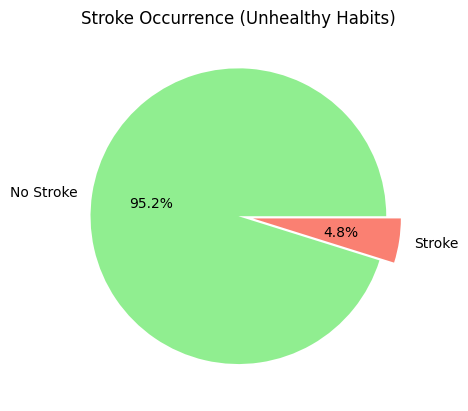

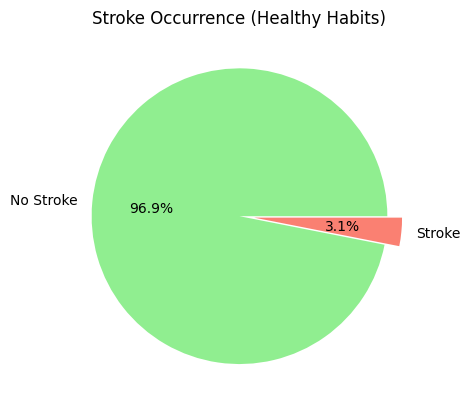

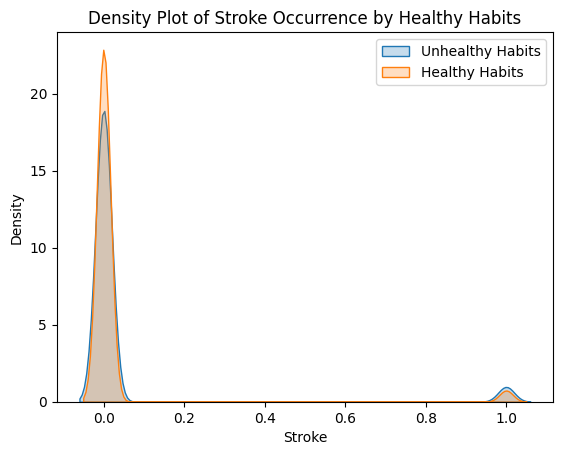


Contingency Table:
Healthy       0       1
Stroke                 
0.0      133996  109392
1.0        6802    3490

Chi-squared Statistic: 486.47893740212845
P-value: 8.316887255960343e-108

Since p-value < 0.05, we reject the null hypothesis.
Conclusion: Healthy lifestyle habits are significantly associated with stroke occurrence.
People with healthy habits are less prone to strokes.


In [31]:
# Stroke vs Healthy Habits

# Create 'Healthy' variable
df['Healthy'] = np.where((df['CholCheck'] == 1) & (df['PhysActivity'] == 1) & (df['Fruits'] == 1) & (df['Veggies'] == 1), 1, 0)

# Split the dataset based on Healthy habits
part5 = df[df['Healthy'] == 0].reset_index(drop=True)
part6 = df[df['Healthy'] == 1].reset_index(drop=True)

# Plot pie charts for Healthy and Unhealthy groups
plot_pie(df[df['Healthy'] == 0], 'Stroke Occurrence (Unhealthy Habits)')
plot_pie(df[df['Healthy'] == 1], 'Stroke Occurrence (Healthy Habits)')

# Kernel Density Plot for Stroke occurrence in both groups
sns.kdeplot(part5['Stroke'], shade=True, label='Unhealthy Habits')
sns.kdeplot(part6['Stroke'], shade=True, label='Healthy Habits')
plt.title('Density Plot of Stroke Occurrence by Healthy Habits')
plt.xlabel('Stroke')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform Chi-Squared Test
contingency_table = pd.crosstab(df['Stroke'], df['Healthy'])
print("\nContingency Table:")
print(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("\nSince p-value < 0.05, we reject the null hypothesis.")
    print("Conclusion: Healthy lifestyle habits are significantly associated with stroke occurrence.")
    print("People with healthy habits are less prone to strokes.")
else:
    print("\nSince p-value >= 0.05, we fail to reject the null hypothesis.")
    print("Conclusion: Healthy lifestyle habits are not significantly associated with stroke occurrence.")


# Explanation of Results

### Creation of 'Healthy' Variable:
Participants are classified based on specific healthy lifestyle criteria.

### Visualization:
Pie charts and KDE plots illustrate the distribution of stroke occurrence among healthy and unhealthy groups.

### Chi-squared Statistic and P-value:
Indicate whether there is a significant association between healthy habits and stroke occurrence.

### Decision:
Based on the p-value and significance level (α = 0.05), we determine whether to reject the null hypothesis.

---

## Final Conclusion
If the **p-value is less than 0.05**, we reject the null hypothesis, concluding that healthy lifestyle habits are significantly associated with stroke occurrence, and people with healthy habits are less prone to strokes.


# Regression

- **Set Seed**: Random seed is set for reproducibility (`random.seed(14628513)`).
- **Correlation Matrix**: Correlation between features is calculated to understand relationships (`df.corr()`).
- **Linear Regression**: Train a Linear Regression model using selected features to predict `MentHlth`. Evaluate using RMSE and R² score.
- **Ridge Regression**: Apply Ridge Regression with hyperparameter tuning via GridSearchCV to avoid overfitting. Evaluate and visualize performance.
- **Lasso Regression**: Use Lasso Regression with hyperparameter tuning to reduce coefficients. Evaluate using RMSE and R² score, and plot best fit line.


# What We Are Trying to Achieve in Regression

### Goal of Regression:
In this analysis, we are using **regression** to predict the exact values of the target variable (`MentHlth`), which represents mental health. The idea is to model the relationship between the selected features (e.g., `DiffWalk`, `PhysHlth`, `GenHlth`, `NoDocbcCost`) and mental health scores.

### Key Objectives:
1. **Quantifying Mental Health**:
   - The goal is to predict the **exact mental health score** based on the provided features. Regression assumes a continuous relationship where changes in features like physical health or general health lead to proportional changes in mental health.

2. **Explaining Variance**:
   - We aim to understand how much of the variation in mental health scores can be explained by these features. A higher **R² score** indicates that the model explains more of the variability in mental health based on the features.
   
3. **Reducing Prediction Errors**:
   - The model aims to minimize prediction errors, as measured by **RMSE (Root Mean Squared Error)**. A lower RMSE means that the model's predicted mental health scores are closer to the actual scores.

### Conclusion:
In summary, the regression model's purpose is to provide an accurate prediction of the continuous variable `MentHlth` (mental health score) based on a set of features. However, the performance of regression models in this case suggests that the relationship between features and mental health might not be best captured using continuous predictions, which leads us to conside


In [32]:
seed = random.seed(14628513)

In [33]:
correlation_matrix=df.corr()
correlation_matrix.iloc[15,:]

,MentHlth
HeartDiseaseorAttack,0.064621
HighBP,0.056456
HighChol,0.062069
CholCheck,-0.008366
BMI,0.085310
Smoker,0.092196
Stroke,0.070172
Diabetes,0.073507
PhysActivity,-0.125587
Fruits,-0.068217


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = df[["DiffWalk", "PhysHlth", "GenHlth", "NoDocbcCost"]]
x.head()
y = df["MentHlth"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14628513)
model = LinearRegression()
model.fit(x, y)
predictions = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
r_squared = model.score(x, y)
print(r_squared)

6.770221659168108
0.16106110468205037


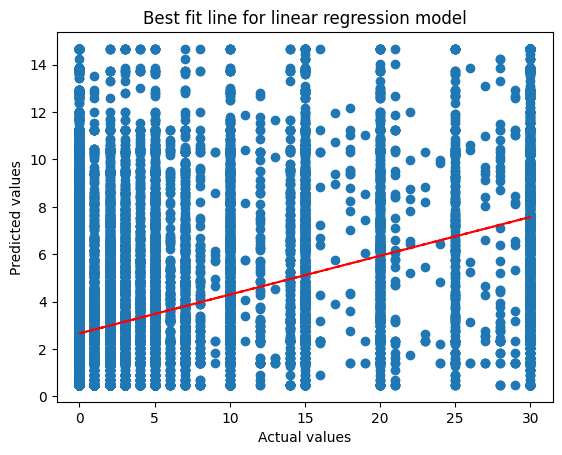

In [35]:
plt.scatter(y_test, predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best fit line for linear regression model")
plt.show()

### Explanation of the Plot

This scatter plot compares the **actual values** (x-axis) to the **predicted values** (y-axis) from a linear regression model. Each blue dot represents a data point, showing how close the predictions are to the actual values.

- The **red line** represents the best fit line, showing the trend of the predictions. Ideally, the predicted values should fall closely along this line, indicating a good fit.
- In this plot, the predictions are widely scattered, indicating that the model does not perfectly capture the relationship between the actual and predicted values. This suggests that the model's accuracy is relatively low, as the data points do not closely align with the best fit line.


# Explanation of Results

### Model Explanation:
I built a **Linear Regression** model to predict mental health (`MentHlth`) using four features: `DiffWalk`, `PhysHlth`, `GenHlth`, and `NoDocbcCost`. These features were chosen because they had the highest correlations with mental health based on the correlation matrix.

### Results:
- **RMSE (6.77)**: This shows the average error in the model's predictions, meaning the predictions are off by about 6.77 units on average.
- **R² score (0.161)**: This means the model explains only 16.1% of the variance in mental health. In other words, the selected features aren't enough to explain mental health well.

### Conclusion:
The model isn't very strong, with moderate prediction errors and limited explanatory power. Adding more features or trying other models could improve the accuracy.



In [36]:
model = linear_model.Ridge()
param_grid = {'alpha': (np.logspace(-8, 8, 500))}

# Use GridSearchCV to find the best combination of hyperparameters
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 21.412201548157228}


In [37]:
model = linear_model.Ridge(alpha=21.412201548157228)
model.fit(x, y)
predictions = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
r_squared = model.score(x, y)
print(r_squared)

6.77020997783002
0.16106108398310237


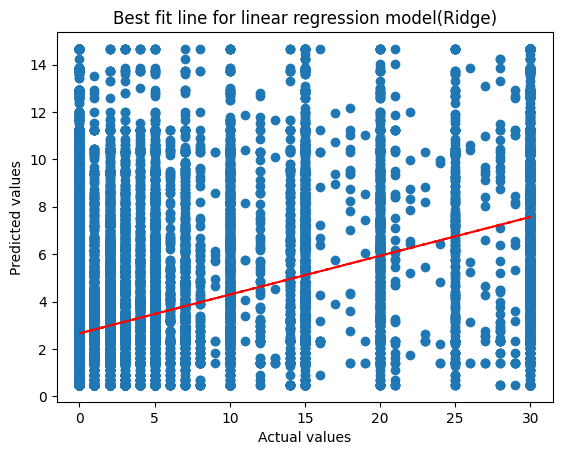

In [38]:
plt.scatter(y_test, predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best fit line for linear regression model(Ridge)")
plt.show()

# Explanation of the Ridge Regression Plot

This scatter plot shows the **actual values** (x-axis) compared to the **predicted values** (y-axis) from the **Ridge Regression** model.

- The **blue dots** represent individual data points, indicating how close the predicted values are to the actual values.
- The **red line** is the best fit line, showing the trend of the predictions.

Similar to the Lasso model, the predicted values are widely scattered, indicating that the model does not capture the relationship between the features and the target variable (mental health) very well. This suggests that Ridge regularization did not lead to a significant improvement in the prediction accuracy.


# Explanation of Ridge Regression Results

### Model Tuning and Training:
In this step, I applied **Ridge Regression** with hyperparameter tuning using **GridSearchCV** to find the optimal value for the regularization parameter `alpha`. The best alpha value was `21.41`, which helps control overfitting.

### Model Evaluation:
After training the Ridge model with the optimal alpha, the model performance was evaluated:
- **RMSE (6.77)**: The average error in the predictions remains around 6.77, similar to the Linear Regression model.
- **R² score (0.161)**: The model explains 16.1% of the variance in mental health, which is the same as before, indicating that regularization didn’t improve the model’s explanatory power significantly.

Overall, Ridge regularization didn’t lead to a noticeable improvement in model performance.


In [39]:
model = linear_model.Lasso()
param_grid = {'alpha': (np.logspace(-8, 8, 500))}

# Use GridSearchCV to find the best combination of hyperparameters
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 1e-08}


In [40]:
model = linear_model.Lasso(alpha=1e-08)
model.fit(x, y)
predictions = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
r_squared = model.score(x, y)
print(r_squared)

6.770221659022012
0.16106110468205048


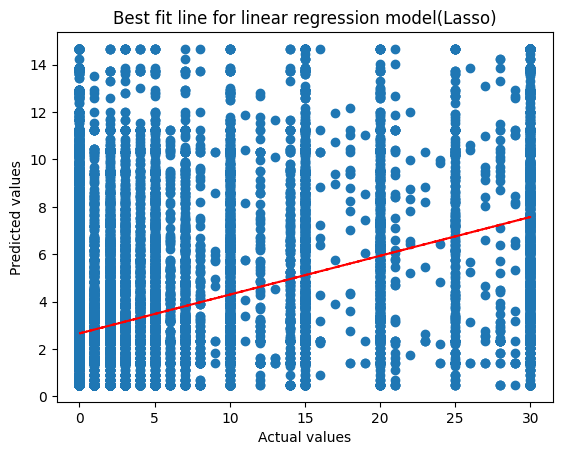

In [41]:
plt.scatter(y_test, predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best fit line for linear regression model(Lasso)")
plt.show()

### Explanation of the Lasso Regression Plot

This scatter plot shows the **actual values** (x-axis) versus the **predicted values** (y-axis) from the **Lasso Regression** model.

- Each blue dot represents a data point, comparing actual mental health scores with predicted values.
- The **red line** is the best fit line for the Lasso regression model, showing the general trend of predictions.

However, the predicted values are widely scattered around the red line, indicating that the model struggles to capture the true relationship between the features and mental health. Similar to the previous models, this suggests that Lasso regression did not significantly improve prediction accuracy.


# Explanation of Lasso Regression Results

### Model Tuning and Training:
Here, I used **Lasso Regression** with **GridSearchCV** to find the best value for the regularization parameter `alpha`. The optimal alpha value found was `1e-08`, which is extremely small, indicating minimal regularization was needed.

### Model Evaluation:
After training the Lasso model with the optimal alpha, the performance metrics were as follows:
- **RMSE (6.77)**: The error remains the same as with Linear and Ridge Regression models, showing no significant change in prediction accuracy.
- **R² score (0.161)**: The model still explains only 16.1% of the variance in mental health, similar to the other models.

Overall, Lasso regularization didn’t improve model performance, likely because the alpha value is too small to significantly affect the model.


# Why All Three Models Perform Similarly

### 1. **Weak Features for Predicting the Target Variable**:
   - The selected features (`DiffWalk`, `PhysHlth`, `GenHlth`, `NoDocbcCost`) have only moderate correlations with the target variable (`MentHlth`). While these features contribute some information, they aren't strong predictors of mental health. This limits the performance of all three models.

### 2. **Limited Regularization Impact**:
   - **Ridge** and **Lasso** are regularization techniques that help prevent overfitting. However, when the predictive power of features is weak, regularization doesn't significantly improve performance. Since overfitting isn't an issue here, the regularization doesn't offer much advantage over basic Linear Regression.

### 3. **Minimal Regularization Effect (Lasso)**:
   - The best alpha value for **Lasso** was very small (`1e-08`), indicating almost no regularization was applied. This made Lasso behave like a standard Linear Regression model, leading to nearly identical results.

### 4. **Linear Relationship Assumptions**:
   - All three models assume a linear relationship between the features and the target variable. If the true relationship is non-linear or more complex, these models are unable to capture it effectively, resulting in similar performance across all three.

### Conclusion:
The similar performance across **Linear**, **Ridge**, and **Lasso** models indicates that the features chosen and the linearity assumption are the primary limitations. To improve the model, better feature selection or trying non-linear models might be needed.


# What's Next: Classification

In the next part, we will focus on **classification** tasks. Specifically, we'll attempt to classify patients who have heart disease based on other health-related parameters such as **HighBP**, **High Cholesterol**, **BMI**, **Smoker**, **Stroke**, **Diabetes**, and more. This will involve various steps including **data preparation**, **feature engineering**, and **model evaluation** using classification algorithms like **Logistic Regression**, **Random Forest**, and **XGBoost**.

We will also explore techniques like **Dimensionality Reduction** and **Hyperparameter Tuning** to enhance model performance. Stay tuned as we dive into the classification phase!
